In [706]:
#!/usr/bin/python

import pandas as pd
import numpy as np
import sys
import pickle
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'bonus', 'deferral_payments','deferred_income', 'director_fees',
                 'exercised_stock_options','expenses', 'from_messages', 
                 'from_poi_to_this_person', 'from_this_person_to_poi',
                 'loan_advances', 'long_term_incentive', 'other',
                 'restricted_stock', 'restricted_stock_deferred',
                 'salary', 'shared_receipt_with_poi', 'to_messages',
                 'total_payments', 'total_stock_value'] 

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [707]:
my_dataset_test = pd.DataFrame(data_dict)

In [708]:
my_dataset = pd.DataFrame(data_dict)

There were 146 data points in this data set and now there are 143 data points.

In [709]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, bonus to total_stock_value
Columns: 146 entries, ALLEN PHILLIP K to YEAP SOON
dtypes: object(146)
memory usage: 24.1+ KB


In [710]:
my_dataset = my_dataset.transpose()

my_dataset.reset_index(inplace = True)

my_dataset.rename(columns = {'index':'Name'}, inplace = True)

In [711]:
my_dataset.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [712]:
my_dataset.groupby('poi')[['poi']].count()

,poi
poi,
False,128
True,18


In [713]:
#remove text feature
email_df = my_dataset['email_address'].astype(str)
my_dataset = my_dataset.drop('email_address', axis = 1)

name_df = pd.DataFrame(my_dataset['Name'])
my_dataset = my_dataset.drop('Name', axis = 1)

In [714]:
# Seperate the POI data to use for classifiers
poi_df = my_dataset['poi'].astype(int)
poi_df = pd.DataFrame(poi_df)
my_dataset['poi'] = my_dataset['poi'].astype(int)

my_dataset_explorer = my_dataset_explorer.drop('poi', axis = 1)

In [715]:
my_dataset = my_dataset.replace('NaN',0.000000001)

In [716]:
my_dataset.apply(pd.to_numeric)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4.175000e+06,2.869717e+06,-3.081055e+06,1.000000e-09,1.729541e+06,1.386800e+04,2.195000e+03,4.700000e+01,6.500000e+01,1.000000e-09,3.048050e+05,1.520000e+02,0,1.260270e+05,-1.260270e+05,2.019550e+05,1.407000e+03,2.902000e+03,4.484442e+06,1.729541e+06
BADUM JAMES P,1.000000e-09,1.789800e+05,1.000000e-09,1.000000e-09,2.578170e+05,3.486000e+03,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.824660e+05,2.578170e+05
BANNANTINE JAMES M,1.000000e-09,1.000000e-09,-5.104000e+03,1.000000e-09,4.046157e+06,5.630100e+04,2.900000e+01,3.900000e+01,0.000000e+00,1.000000e-09,1.000000e-09,8.645230e+05,0,1.757552e+06,-5.602220e+05,4.770000e+02,4.650000e+02,5.660000e+02,9.161970e+05,5.243487e+06
BAXTER JOHN C,1.200000e+06,1.295738e+06,-1.386055e+06,1.000000e-09,6.680544e+06,1.120000e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.586055e+06,2.660303e+06,0,3.942714e+06,1.000000e-09,2.671020e+05,1.000000e-09,1.000000e-09,5.634343e+06,1.062326e+07
BAY FRANKLIN R,4.000000e+05,2.604550e+05,-2.016410e+05,1.000000e-09,1.000000e-09,1.291420e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,6.900000e+01,0,1.457960e+05,-8.278200e+04,2.396710e+05,1.000000e-09,1.000000e-09,8.276960e+05,6.301400e+04
BAZELIDES PHILIP J,1.000000e-09,6.846940e+05,1.000000e-09,1.000000e-09,1.599641e+06,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,9.375000e+04,8.740000e+02,0,1.000000e-09,1.000000e-09,8.081800e+04,1.000000e-09,1.000000e-09,8.601360e+05,1.599641e+06
BECK SALLY W,7.000000e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,3.717200e+04,4.343000e+03,1.440000e+02,3.860000e+02,1.000000e-09,1.000000e-09,5.660000e+02,0,1.260270e+05,1.000000e-09,2.313300e+05,2.639000e+03,7.315000e+03,9.690680e+05,1.260270e+05
BELDEN TIMOTHY N,5.249999e+06,2.144013e+06,-2.334434e+06,1.000000e-09,9.531360e+05,1.735500e+04,4.840000e+02,2.280000e+02,1.080000e+02,1.000000e-09,1.000000e-09,2.106980e+05,1,1.575690e+05,1.000000e-09,2.139990e+05,5.521000e+03,7.991000e+03,5.501630e+06,1.110705e+06
BELFER ROBERT,1.000000e-09,-1.025000e+05,1.000000e-09,3.285000e+03,3.285000e+03,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,4.409300e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.025000e+05,-4.409300e+04
BERBERIAN DAVID,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.624396e+06,1.189200e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,8.692200e+05,1.000000e-09,2.165820e+05,1.000000e-09,1.000000e-09,2.284740e+05,2.493616e+06


In [695]:
def outlier_removal(log_data):
    from sets import Set
    outlierSet = Set()
    outliers_remove = Set()

    # For each feature find the data points with extreme high or low values
    for feature in log_data.keys():

        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(log_data[feature], 25)

        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(log_data[feature], 75)

        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3-Q1)*3
#http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/

        #Display the outliers
        print "Data points considered outliers for the feature '{}':".format(feature)
        display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

        outliers_df = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
        for i in outliers_df.index.values:

            if i not in outlierSet:
                outlierSet.add(i)
            else:
                outliers_remove.add(i)

    #OPTIONAL: Select the indices for data points you wish to remove
    outliers  = list(outliers_remove)
    print "Outliers in more than one set: \n"
    print outliers

        #Remove the outliers, if any were specified
    good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
    return good_data

In [696]:
outlier_removal(my_dataset)

Data points considered outliers for the feature 'bonus':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,4175000.0,2.869717e+06,-3.081055e+06,1.000000e-09,1729541.0,13868.0,2.195000e+03,4.700000e+01,6.500000e+01,1.000000e-09,3.048050e+05,152.0,0,126027.0,-1.260270e+05,201955.0,1.407000e+03,2.902000e+03,4484442.0,1729541.0
7,5249999.0,2.144013e+06,-2.334434e+06,1.000000e-09,953136.0,17355.0,4.840000e+02,2.280000e+02,1.080000e+02,1.000000e-09,1.000000e-09,210698.0,1,157569.0,1.000000e-09,213999.0,5.521000e+03,7.991000e+03,5501630.0,1110705.0
78,8000000.0,1.000000e-09,1.000000e-09,1.000000e-09,4158995.0,49537.0,2.585000e+03,5.280000e+02,4.110000e+02,1.000000e-09,2.035380e+06,1552.0,0,1008149.0,1.000000e-09,339288.0,3.962000e+03,7.259000e+03,10425757.0,5167144.0
79,7000000.0,2.029110e+05,-3.000000e+05,1.000000e-09,34348384.0,99832.0,3.600000e+01,1.230000e+02,1.600000e+01,8.152500e+07,3.600000e+06,10359729.0,1,14761694.0,1.000000e-09,1072321.0,2.411000e+03,4.273000e+03,103559793.0,49110078.0
122,5600000.0,1.000000e-09,1.000000e-09,1.000000e-09,19250000.0,29336.0,1.080000e+02,8.800000e+01,3.000000e+01,1.000000e-09,1.920000e+06,22122.0,1,6843672.0,1.000000e-09,1111258.0,2.042000e+03,3.627000e+03,8682716.0,26093672.0
130,97343619.0,3.208340e+07,-2.799289e+07,1.398517e+06,311764000.0,5235198.0,1.000000e-09,1.000000e-09,1.000000e-09,8.392500e+07,4.852193e+07,42667589.0,0,130322299.0,-7.576788e+06,26704229.0,1.000000e-09,1.000000e-09,309886585.0,434509511.0


Data points considered outliers for the feature 'deferral_payments':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,4.175000e+06,2869717.0,-3.081055e+06,1.000000e-09,1.729541e+06,1.386800e+04,2.195000e+03,4.700000e+01,6.500000e+01,1.000000e-09,3.048050e+05,1.520000e+02,0,1.260270e+05,-1.260270e+05,2.019550e+05,1.407000e+03,2.902000e+03,4484442.0,1.729541e+06
1,1.000000e-09,178980.0,1.000000e-09,1.000000e-09,2.578170e+05,3.486000e+03,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,182466.0,2.578170e+05
3,1.200000e+06,1295738.0,-1.386055e+06,1.000000e-09,6.680544e+06,1.120000e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.586055e+06,2.660303e+06,0,3.942714e+06,1.000000e-09,2.671020e+05,1.000000e-09,1.000000e-09,5634343.0,1.062326e+07
4,4.000000e+05,260455.0,-2.016410e+05,1.000000e-09,1.000000e-09,1.291420e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,6.900000e+01,0,1.457960e+05,-8.278200e+04,2.396710e+05,1.000000e-09,1.000000e-09,827696.0,6.301400e+04
5,1.000000e-09,684694.0,1.000000e-09,1.000000e-09,1.599641e+06,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,9.375000e+04,8.740000e+02,0,1.000000e-09,1.000000e-09,8.081800e+04,1.000000e-09,1.000000e-09,860136.0,1.599641e+06
7,5.249999e+06,2144013.0,-2.334434e+06,1.000000e-09,9.531360e+05,1.735500e+04,4.840000e+02,2.280000e+02,1.080000e+02,1.000000e-09,1.000000e-09,2.106980e+05,1,1.575690e+05,1.000000e-09,2.139990e+05,5.521000e+03,7.991000e+03,5501630.0,1.110705e+06
8,1.000000e-09,-102500.0,1.000000e-09,3.285000e+03,3.285000e+03,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,4.409300e+04,1.000000e-09,1.000000e-09,1.000000e-09,102500.0,-4.409300e+04
19,9.000000e+05,649584.0,-6.948620e+05,1.000000e-09,2.542813e+06,1.000000e-09,1.053000e+03,1.560000e+02,7.100000e+01,1.000000e-09,7.698620e+05,4.005720e+05,0,9.016570e+05,1.000000e-09,3.305460e+05,2.333000e+03,3.523000e+03,2355702.0,3.444470e+06
33,4.250000e+05,875307.0,-7.752410e+05,1.000000e-09,2.027865e+06,5.225500e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,4.156570e+05,1.105000e+03,0,3.150680e+05,-3.150680e+05,2.105000e+05,1.000000e-09,1.000000e-09,1204583.0,2.027865e+06
46,1.000000e-09,181755.0,1.000000e-09,1.000000e-09,3.434340e+05,1.000000e-09,1.300000e+01,0.000000e+00,0.000000e+00,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,2.000000e+00,5.700000e+01,181755.0,3.434340e+05


Data points considered outliers for the feature 'deferred_income':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,4175000.0,2.869717e+06,-3081055.0,1.000000e-09,1.729541e+06,1.386800e+04,2.195000e+03,4.700000e+01,6.500000e+01,1.000000e-09,3.048050e+05,152.0,0,126027.0,-1.260270e+05,201955.0,1.407000e+03,2.902000e+03,4484442.0,1.729541e+06
3,1200000.0,1.295738e+06,-1386055.0,1.000000e-09,6.680544e+06,1.120000e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.586055e+06,2660303.0,0,3942714.0,1.000000e-09,267102.0,1.000000e-09,1.000000e-09,5634343.0,1.062326e+07
4,400000.0,2.604550e+05,-201641.0,1.000000e-09,1.000000e-09,1.291420e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,69.0,0,145796.0,-8.278200e+04,239671.0,1.000000e-09,1.000000e-09,827696.0,6.301400e+04
7,5249999.0,2.144013e+06,-2334434.0,1.000000e-09,9.531360e+05,1.735500e+04,4.840000e+02,2.280000e+02,1.080000e+02,1.000000e-09,1.000000e-09,210698.0,1,157569.0,1.000000e-09,213999.0,5.521000e+03,7.991000e+03,5501630.0,1.110705e+06
10,250000.0,1.000000e-09,-485813.0,1.000000e-09,1.000000e-09,5.917500e+04,5.900000e+01,4.000000e+00,0.000000e+00,1.000000e-09,1.802500e+05,427316.0,0,659249.0,1.000000e-09,187922.0,2.330000e+02,3.830000e+02,618850.0,6.592490e+05
19,900000.0,6.495840e+05,-694862.0,1.000000e-09,2.542813e+06,1.000000e-09,1.053000e+03,1.560000e+02,7.100000e+01,1.000000e-09,7.698620e+05,400572.0,0,901657.0,1.000000e-09,330546.0,2.333000e+03,3.523000e+03,2355702.0,3.444470e+06
20,1250000.0,1.000000e-09,-262500.0,1.000000e-09,1.000000e-09,3.581800e+04,1.440000e+02,1.990000e+02,2.500000e+01,1.000000e-09,3.753040e+05,486.0,1,126027.0,1.000000e-09,240189.0,2.188000e+03,2.598000e+03,1639297.0,1.260270e+05
21,300000.0,1.000000e-09,-159792.0,1.000000e-09,1.000000e-09,1.000000e-09,1.500000e+01,2.900000e+01,7.000000e+00,1.000000e-09,7.500000e+04,540.0,0,307301.0,-3.073010e+05,261809.0,1.960000e+02,3.120000e+02,477557.0,1.000000e-09
22,1000000.0,1.000000e-09,-235000.0,1.000000e-09,1.000000e-09,3.067400e+04,4.900000e+01,5.800000e+01,1.200000e+01,1.000000e-09,3.500000e+05,307895.0,1,2502063.0,1.000000e-09,415189.0,1.585000e+03,1.892000e+03,1868758.0,2.502063e+06
32,800000.0,1.000000e-09,-1284000.0,1.000000e-09,8.831913e+06,5.112400e+04,9.090000e+02,6.400000e+01,2.000000e+01,1.000000e-09,4.840000e+05,7482.0,0,1787380.0,-1.787380e+06,492375.0,1.401000e+03,2.181000e+03,550981.0,8.831913e+06


Data points considered outliers for the feature 'director_fees':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
8,1.000000e-09,-1.025000e+05,1.000000e-09,3285.0,3.285000e+03,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,4.409300e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.025000e+05,-4.409300e+04
11,1.000000e-09,1.000000e-09,1.000000e-09,137864.0,2.604490e+06,1.000000e-09,2.900000e+01,0.000000e+00,1.000000e+00,1.000000e-09,1.000000e-09,1.378640e+05,0,-2.604490e+06,1.545629e+07,1.000000e-09,4.630000e+02,5.230000e+02,1.545629e+07,1.000000e-09
14,1.000000e-09,1.000000e-09,-1.137840e+05,113784.0,1.000000e-09,1.279000e+03,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.279000e+03,1.000000e-09
23,1.000000e-09,1.000000e-09,-9.878400e+04,98784.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,3.246000e+04,-3.246000e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
38,1.000000e-09,1.000000e-09,-2.500000e+04,102492.0,3.717500e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,7.749200e+04,3.717500e+05
56,1.000000e-09,1.000000e-09,1.000000e-09,119292.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.192920e+05,1.000000e-09
71,1.000000e-09,1.000000e-09,-2.500000e+04,108750.0,4.317500e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,4.409300e+04,-4.409300e+04,1.000000e-09,1.000000e-09,1.000000e-09,8.375000e+04,4.317500e+05
81,1.000000e-09,1.000000e-09,-2.500000e+04,112492.0,4.128780e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,8.749200e+04,4.128780e+05
92,1.000000e-09,1.000000e-09,-1.037500e+05,103750.0,1.000000e-09,1.480000e+02,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.480000e+02,1.000000e-09
94,1.000000e-09,1.000000e-09,-3.834600e+04,38346.0,1.000000e-09,2.151000e+03,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,2.151000e+03,1.000000e-09


Data points considered outliers for the feature 'exercised_stock_options':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
32,8.000000e+05,1.000000e-09,-1.284000e+06,1.000000e-09,8831913.0,51124.0,9.090000e+02,6.400000e+01,2.000000e+01,1.000000e-09,4.840000e+05,7.482000e+03,0,1.787380e+06,-1.787380e+06,4.923750e+05,1.401000e+03,2.181000e+03,550981.0,8831913.0
35,1.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,8191755.0,35812.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,6.948620e+05,3.746890e+05,0,1.260270e+05,1.000000e-09,2.627880e+05,1.000000e-09,1.000000e-09,2368151.0,8317782.0
47,2.000000e+06,6.426990e+06,-3.367011e+06,1.000000e-09,10433518.0,86987.0,2.100000e+01,2.420000e+02,6.000000e+00,2.000000e+06,1.617011e+06,7.427621e+06,0,4.188667e+06,1.000000e-09,1.060932e+06,2.979000e+03,3.275000e+03,17252530.0,14622185.0
65,1.000000e-09,1.025900e+04,1.000000e-09,1.000000e-09,30766064.0,77978.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,2.856000e+03,1,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,91093.0,30766064.0
79,7.000000e+06,2.029110e+05,-3.000000e+05,1.000000e-09,34348384.0,99832.0,3.600000e+01,1.230000e+02,1.600000e+01,8.152500e+07,3.600000e+06,1.035973e+07,1,1.476169e+07,1.000000e-09,1.072321e+06,2.411000e+03,4.273000e+03,103559793.0,49110078.0
103,1.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,15364167.0,32047.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.829457e+06,0,8.453763e+06,1.000000e-09,2.618790e+05,1.000000e-09,1.000000e-09,3123383.0,23817930.0
110,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,7509039.0,14689.0,2.210000e+02,2.040000e+02,4.900000e+01,1.000000e-09,1.000000e-09,1.000000e-09,0,3.812850e+05,1.000000e-09,9.684000e+04,1.063000e+03,1.671000e+03,111529.0,7890324.0
112,1.750000e+06,1.000000e-09,-3.504386e+06,1.000000e-09,19794175.0,46950.0,1.800000e+01,4.200000e+01,4.000000e+00,1.000000e-09,1.617011e+06,1.748390e+05,1,2.748364e+06,1.000000e-09,4.206360e+05,8.640000e+02,9.050000e+02,505050.0,22542539.0
122,5.600000e+06,1.000000e-09,1.000000e-09,1.000000e-09,19250000.0,29336.0,1.080000e+02,8.800000e+01,3.000000e+01,1.000000e-09,1.920000e+06,2.212200e+04,1,6.843672e+06,1.000000e-09,1.111258e+06,2.042000e+03,3.627000e+03,8682716.0,26093672.0
130,9.734362e+07,3.208340e+07,-2.799289e+07,1.398517e+06,311764000.0,5235198.0,1.000000e-09,1.000000e-09,1.000000e-09,8.392500e+07,4.852193e+07,4.266759e+07,0,1.303223e+08,-7.576788e+06,2.670423e+07,1.000000e-09,1.000000e-09,309886585.0,434509511.0


Data points considered outliers for the feature 'expenses':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
88,9.000000e+05,1.000000e-09,-125000.0,1.000000e-09,5.067650e+05,228763.0,4.900000e+01,5.200000e+01,0.000000e+00,1.000000e-09,1.000000e-09,5.158700e+04,0,4.410960e+05,1.000000e-09,2.634130e+05,1.469000e+03,1.744000e+03,1318763.0,9.478610e+05
130,9.734362e+07,3.208340e+07,-27992891.0,1.398517e+06,3.117640e+08,5235198.0,1.000000e-09,1.000000e-09,1.000000e-09,8.392500e+07,4.852193e+07,4.266759e+07,0,1.303223e+08,-7.576788e+06,2.670423e+07,1.000000e-09,1.000000e-09,309886585.0,4.345095e+08
132,1.000000e-09,1.000000e-09,-36666.0,3.666600e+04,1.000000e-09,228656.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,228656.0,1.000000e-09


Data points considered outliers for the feature 'from_messages':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,4.175000e+06,2.869717e+06,-3.081055e+06,1.000000e-09,1.729541e+06,1.386800e+04,2195.0,47.0,65.0,1.000000e-09,3.048050e+05,1.520000e+02,0,1.260270e+05,-1.260270e+05,2.019550e+05,1407.0,2902.0,4.484442e+06,1729541.0
6,7.000000e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,3.717200e+04,4343.0,144.0,386.0,1.000000e-09,1.000000e-09,5.660000e+02,0,1.260270e+05,1.000000e-09,2.313300e+05,2639.0,7315.0,9.690680e+05,126027.0
7,5.249999e+06,2.144013e+06,-2.334434e+06,1.000000e-09,9.531360e+05,1.735500e+04,484.0,228.0,108.0,1.000000e-09,1.000000e-09,2.106980e+05,1,1.575690e+05,1.000000e-09,2.139990e+05,5521.0,7991.0,5.501630e+06,1110705.0
19,9.000000e+05,6.495840e+05,-6.948620e+05,1.000000e-09,2.542813e+06,1.000000e-09,1053.0,156.0,71.0,1.000000e-09,7.698620e+05,4.005720e+05,0,9.016570e+05,1.000000e-09,3.305460e+05,2333.0,3523.0,2.355702e+06,3444470.0
31,3.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,2.291113e+06,8.617400e+04,3069.0,66.0,609.0,1.000000e-09,1.294981e+06,1.661000e+03,1,1.323148e+06,1.000000e-09,3.651630e+05,2097.0,3093.0,4.747979e+06,3614261.0
32,8.000000e+05,1.000000e-09,-1.284000e+06,1.000000e-09,8.831913e+06,5.112400e+04,909.0,64.0,20.0,1.000000e-09,4.840000e+05,7.482000e+03,0,1.787380e+06,-1.787380e+06,4.923750e+05,1401.0,2181.0,5.509810e+05,8831913.0
58,1.150000e+06,2.157527e+06,-9.344840e+05,1.000000e-09,6.087500e+05,7.616900e+04,1941.0,180.0,61.0,1.000000e-09,9.833460e+05,5.238200e+04,0,5.241690e+05,-3.298250e+05,3.741250e+05,1847.0,4009.0,3.859065e+06,803094.0
62,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1061.0,35.0,38.0,1.000000e-09,1.000000e-09,1.000000e-09,0,3.466630e+05,1.000000e-09,1.000000e-09,571.0,2649.0,1.000000e-09,346663.0
66,1.000000e-09,3.131860e+06,1.000000e-09,1.000000e-09,5.210569e+06,1.000000e-09,1073.0,44.0,15.0,1.000000e-09,1.000000e-09,1.000000e-09,0,2.046079e+06,1.000000e-09,1.000000e-09,1074.0,2350.0,3.131860e+06,7256648.0
72,4.000000e+05,1.000000e-09,1.000000e-09,1.000000e-09,8.500100e+05,8.358500e+04,14368.0,41.0,171.0,1.000000e-09,3.234660e+05,4.669000e+03,0,1.260270e+05,1.000000e-09,2.751010e+05,583.0,4607.0,1.086821e+06,976037.0


Data points considered outliers for the feature 'from_poi_to_this_person':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
7,5.249999e+06,2.144013e+06,-2.334434e+06,1.000000e-09,9.531360e+05,17355.0,484.0,228.0,108.0,1.000000e-09,1.000000e-09,2.106980e+05,1,157569.0,1.000000e-09,213999.0,5521.0,7991.0,5501630.0,1110705.0
20,1.250000e+06,1.000000e-09,-2.625000e+05,1.000000e-09,1.000000e-09,35818.0,144.0,199.0,25.0,1.000000e-09,3.753040e+05,4.860000e+02,1,126027.0,1.000000e-09,240189.0,2188.0,2598.0,1639297.0,126027.0
26,1.200000e+06,2.761000e+04,-1.440620e+05,1.000000e-09,1.000000e-09,16514.0,40.0,240.0,11.0,1.000000e-09,1.000000e-09,1.017400e+05,1,698242.0,1.000000e-09,288542.0,1132.0,1758.0,1490344.0,698242.0
34,6.000000e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.550019e+06,3475.0,63.0,305.0,14.0,1.000000e-09,5.564160e+05,4.730000e+02,0,315068.0,1.000000e-09,250100.0,1902.0,2572.0,1410464.0,1865087.0
37,8.000000e+05,1.000000e-09,-3.000000e+05,1.000000e-09,7.659200e+05,96268.0,22.0,188.0,11.0,1.000000e-09,1.000000e-09,8.910000e+02,0,315068.0,1.000000e-09,278601.0,772.0,865.0,875760.0,1080988.0
47,2.000000e+06,6.426990e+06,-3.367011e+06,1.000000e-09,1.043352e+07,86987.0,21.0,242.0,6.0,2.000000e+06,1.617011e+06,7.427621e+06,0,4188667.0,1.000000e-09,1060932.0,2979.0,3275.0,17252530.0,14622185.0
58,1.150000e+06,2.157527e+06,-9.344840e+05,1.000000e-09,6.087500e+05,76169.0,1941.0,180.0,61.0,1.000000e-09,9.833460e+05,5.238200e+04,0,524169.0,-3.298250e+05,374125.0,1847.0,4009.0,3859065.0,803094.0
75,3.100000e+06,1.000000e-09,1.000000e-09,1.000000e-09,8.104200e+04,5774.0,1728.0,251.0,194.0,1.000000e-09,1.000000e-09,9.392500e+04,0,466101.0,1.000000e-09,271442.0,3669.0,8305.0,3471141.0,547143.0
78,8.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,4.158995e+06,49537.0,2585.0,528.0,411.0,1.000000e-09,2.035380e+06,1.552000e+03,0,1008149.0,1.000000e-09,339288.0,3962.0,7259.0,10425757.0,5167144.0
110,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,7.509039e+06,14689.0,221.0,204.0,49.0,1.000000e-09,1.000000e-09,1.000000e-09,0,381285.0,1.000000e-09,96840.0,1063.0,1671.0,111529.0,7890324.0


Data points considered outliers for the feature 'from_this_person_to_poi':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,4175000.0,2.869717e+06,-3.081055e+06,1.000000e-09,1.729541e+06,1.386800e+04,2195.0,47.0,65.0,1.000000e-09,3.048050e+05,152.0,0,126027.0,-1.260270e+05,201955.0,1407.0,2902.0,4484442.0,1729541.0
6,700000.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,3.717200e+04,4343.0,144.0,386.0,1.000000e-09,1.000000e-09,566.0,0,126027.0,1.000000e-09,231330.0,2639.0,7315.0,969068.0,126027.0
7,5249999.0,2.144013e+06,-2.334434e+06,1.000000e-09,9.531360e+05,1.735500e+04,484.0,228.0,108.0,1.000000e-09,1.000000e-09,210698.0,1,157569.0,1.000000e-09,213999.0,5521.0,7991.0,5501630.0,1110705.0
19,900000.0,6.495840e+05,-6.948620e+05,1.000000e-09,2.542813e+06,1.000000e-09,1053.0,156.0,71.0,1.000000e-09,7.698620e+05,400572.0,0,901657.0,1.000000e-09,330546.0,2333.0,3523.0,2355702.0,3444470.0
31,3000000.0,1.000000e-09,1.000000e-09,1.000000e-09,2.291113e+06,8.617400e+04,3069.0,66.0,609.0,1.000000e-09,1.294981e+06,1661.0,1,1323148.0,1.000000e-09,365163.0,2097.0,3093.0,4747979.0,3614261.0
58,1150000.0,2.157527e+06,-9.344840e+05,1.000000e-09,6.087500e+05,7.616900e+04,1941.0,180.0,61.0,1.000000e-09,9.833460e+05,52382.0,0,524169.0,-3.298250e+05,374125.0,1847.0,4009.0,3859065.0,803094.0
72,400000.0,1.000000e-09,1.000000e-09,1.000000e-09,8.500100e+05,8.358500e+04,14368.0,41.0,171.0,1.000000e-09,3.234660e+05,4669.0,0,126027.0,1.000000e-09,275101.0,583.0,4607.0,1086821.0,976037.0
73,1000000.0,1.000000e-09,1.000000e-09,1.000000e-09,2.022048e+06,4.195300e+04,6759.0,140.0,387.0,1.000000e-09,3.000000e+05,1231.0,0,4131594.0,1.000000e-09,404338.0,3639.0,12754.0,1747522.0,6153642.0
75,3100000.0,1.000000e-09,1.000000e-09,1.000000e-09,8.104200e+04,5.774000e+03,1728.0,251.0,194.0,1.000000e-09,1.000000e-09,93925.0,0,466101.0,1.000000e-09,271442.0,3669.0,8305.0,3471141.0,547143.0
78,8000000.0,1.000000e-09,1.000000e-09,1.000000e-09,4.158995e+06,4.953700e+04,2585.0,528.0,411.0,1.000000e-09,2.035380e+06,1552.0,0,1008149.0,1.000000e-09,339288.0,3962.0,7259.0,10425757.0,5167144.0


Data points considered outliers for the feature 'loan_advances':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
47,2000000.0,6.426990e+06,-3.367011e+06,1.000000e-09,10433518.0,86987.0,2.100000e+01,2.420000e+02,6.000000e+00,2000000.0,1.617011e+06,7.427621e+06,0,4.188667e+06,1.000000e-09,1060932.0,2.979000e+03,3.275000e+03,17252530.0,14622185.0
79,7000000.0,2.029110e+05,-3.000000e+05,1.000000e-09,34348384.0,99832.0,3.600000e+01,1.230000e+02,1.600000e+01,81525000.0,3.600000e+06,1.035973e+07,1,1.476169e+07,1.000000e-09,1072321.0,2.411000e+03,4.273000e+03,103559793.0,49110078.0
105,300000.0,1.000000e-09,1.000000e-09,1.000000e-09,28798.0,31653.0,6.700000e+01,7.000000e+00,0.000000e+00,400000.0,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,655037.0,7.280000e+02,8.980000e+02,1386690.0,28798.0
130,97343619.0,3.208340e+07,-2.799289e+07,1.398517e+06,311764000.0,5235198.0,1.000000e-09,1.000000e-09,1.000000e-09,83925000.0,4.852193e+07,4.266759e+07,0,1.303223e+08,-7.576788e+06,26704229.0,1.000000e-09,1.000000e-09,309886585.0,434509511.0


Data points considered outliers for the feature 'long_term_incentive':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
3,1.200000e+06,1.295738e+06,-1.386055e+06,1.000000e-09,6.680544e+06,1.120000e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1586055.0,2660303.0,0,3.942714e+06,1.000000e-09,267102.0,1.000000e-09,1.000000e-09,5634343.0,10623258.0
40,2.000000e+05,1.000000e-09,1.000000e-09,1.000000e-09,6.014380e+05,2.153000e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,2234774.0,53775.0,0,4.075030e+05,1.000000e-09,182245.0,1.000000e-09,1.000000e-09,2692324.0,1008941.0
43,1.300000e+06,1.000000e-09,-1.386055e+06,1.000000e-09,1.000000e-09,5.592100e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1736055.0,277464.0,1,1.794412e+06,1.000000e-09,440698.0,1.000000e-09,1.000000e-09,2424083.0,1794412.0
47,2.000000e+06,6.426990e+06,-3.367011e+06,1.000000e-09,1.043352e+07,8.698700e+04,2.100000e+01,2.420000e+02,6.000000e+00,2.000000e+06,1617011.0,7427621.0,0,4.188667e+06,1.000000e-09,1060932.0,2.979000e+03,3.275000e+03,17252530.0,14622185.0
59,1.500000e+06,1.000000e-09,-3.117011e+06,1.000000e-09,5.538001e+06,3.403900e+04,3.200000e+01,3.200000e+01,2.100000e+01,1.000000e-09,1617011.0,11350.0,1,8.530640e+05,1.000000e-09,243293.0,1.035000e+03,1.045000e+03,288682.0,6391065.0
78,8.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,4.158995e+06,4.953700e+04,2.585000e+03,5.280000e+02,4.110000e+02,1.000000e-09,2035380.0,1552.0,0,1.008149e+06,1.000000e-09,339288.0,3.962000e+03,7.259000e+03,10425757.0,5167144.0
79,7.000000e+06,2.029110e+05,-3.000000e+05,1.000000e-09,3.434838e+07,9.983200e+04,3.600000e+01,1.230000e+02,1.600000e+01,8.152500e+07,3600000.0,10359729.0,1,1.476169e+07,1.000000e-09,1072321.0,2.411000e+03,4.273000e+03,103559793.0,49110078.0
86,1.000000e-09,8.543000e+04,1.000000e-09,1.000000e-09,2.070306e+06,8.211000e+03,2.300000e+02,8.000000e+00,0.000000e+00,1.000000e-09,5145434.0,2818454.0,0,1.000000e-09,1.000000e-09,349487.0,4.770000e+02,1.522000e+03,8407016.0,2070306.0
98,1.100000e+06,8.429240e+05,-7.190000e+05,1.000000e-09,1.056320e+06,1.000000e-09,1.600000e+01,1.200000e+01,0.000000e+00,1.000000e-09,1725545.0,947.0,0,3.605280e+05,1.000000e-09,251654.0,1.140000e+02,1.360000e+02,3202070.0,1416848.0
112,1.750000e+06,1.000000e-09,-3.504386e+06,1.000000e-09,1.979418e+07,4.695000e+04,1.800000e+01,4.200000e+01,4.000000e+00,1.000000e-09,1617011.0,174839.0,1,2.748364e+06,1.000000e-09,420636.0,8.640000e+02,9.050000e+02,505050.0,22542539.0


Data points considered outliers for the feature 'other':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
2,1.000000e-09,1.000000e-09,-5.104000e+03,1.000000e-09,4.046157e+06,5.630100e+04,2.900000e+01,3.900000e+01,0.000000e+00,1.000000e-09,1.000000e-09,864523.0,0,1.757552e+06,-5.602220e+05,477.0,4.650000e+02,5.660000e+02,916197.0,5.243487e+06
3,1.200000e+06,1.295738e+06,-1.386055e+06,1.000000e-09,6.680544e+06,1.120000e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.586055e+06,2660303.0,0,3.942714e+06,1.000000e-09,267102.0,1.000000e-09,1.000000e-09,5634343.0,1.062326e+07
47,2.000000e+06,6.426990e+06,-3.367011e+06,1.000000e-09,1.043352e+07,8.698700e+04,2.100000e+01,2.420000e+02,6.000000e+00,2.000000e+06,1.617011e+06,7427621.0,0,4.188667e+06,1.000000e-09,1060932.0,2.979000e+03,3.275000e+03,17252530.0,1.462218e+07
55,7.500000e+05,1.000000e-09,1.000000e-09,1.000000e-09,4.365150e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,3.048050e+05,819288.0,0,4.410960e+05,1.000000e-09,272880.0,1.000000e-09,1.000000e-09,2146973.0,8.776110e+05
57,1.000000e-09,9.358500e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,3.656250e+05,680833.0,0,1.000000e-09,1.000000e-09,6615.0,1.000000e-09,1.000000e-09,1146658.0,1.000000e-09
69,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,2.165172e+06,2.809300e+04,1.900000e+01,2.800000e+01,5.000000e+00,1.000000e-09,3.125000e+05,1553729.0,0,3.654808e+06,1.000000e-09,85274.0,4.370000e+02,4.960000e+02,1979596.0,5.819980e+06
77,8.000000e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.181340e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,6.026710e+05,907502.0,1,9.850320e+05,1.000000e-09,224305.0,1.000000e-09,1.000000e-09,2652612.0,9.850320e+05
79,7.000000e+06,2.029110e+05,-3.000000e+05,1.000000e-09,3.434838e+07,9.983200e+04,3.600000e+01,1.230000e+02,1.600000e+01,8.152500e+07,3.600000e+06,10359729.0,1,1.476169e+07,1.000000e-09,1072321.0,2.411000e+03,4.273000e+03,103559793.0,4.911008e+07
86,1.000000e-09,8.543000e+04,1.000000e-09,1.000000e-09,2.070306e+06,8.211000e+03,2.300000e+02,8.000000e+00,0.000000e+00,1.000000e-09,5.145434e+06,2818454.0,0,1.000000e-09,1.000000e-09,349487.0,4.770000e+02,1.522000e+03,8407016.0,2.070306e+06
103,1.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,1.536417e+07,3.204700e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1829457.0,0,8.453763e+06,1.000000e-09,261879.0,1.000000e-09,1.000000e-09,3123383.0,2.381793e+07


Data points considered outliers for the feature 'poi':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
7,5.249999e+06,2.144013e+06,-2.334434e+06,1.000000e-09,9.531360e+05,17355.0,4.840000e+02,2.280000e+02,1.080000e+02,1.000000e-09,1.000000e-09,210698.0,1,1.575690e+05,1.000000e-09,2.139990e+05,5.521000e+03,7.991000e+03,5501630.0,1110705.0
15,1.350000e+06,1.000000e-09,-8.330000e+02,1.000000e-09,1.000000e-09,65907.0,2.700000e+01,1.400000e+02,1.500000e+01,1.000000e-09,9.742930e+05,1621.0,1,2.520550e+05,1.000000e-09,2.786010e+05,1.593000e+03,1.858000e+03,2669589.0,252055.0
20,1.250000e+06,1.000000e-09,-2.625000e+05,1.000000e-09,1.000000e-09,35818.0,1.440000e+02,1.990000e+02,2.500000e+01,1.000000e-09,3.753040e+05,486.0,1,1.260270e+05,1.000000e-09,2.401890e+05,2.188000e+03,2.598000e+03,1639297.0,126027.0
22,1.000000e+06,1.000000e-09,-2.350000e+05,1.000000e-09,1.000000e-09,30674.0,4.900000e+01,5.800000e+01,1.200000e+01,1.000000e-09,3.500000e+05,307895.0,1,2.502063e+06,1.000000e-09,4.151890e+05,1.585000e+03,1.892000e+03,1868758.0,2502063.0
26,1.200000e+06,2.761000e+04,-1.440620e+05,1.000000e-09,1.000000e-09,16514.0,4.000000e+01,2.400000e+02,1.100000e+01,1.000000e-09,1.000000e-09,101740.0,1,6.982420e+05,1.000000e-09,2.885420e+05,1.132000e+03,1.758000e+03,1490344.0,698242.0
31,3.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,2.291113e+06,86174.0,3.069000e+03,6.600000e+01,6.090000e+02,1.000000e-09,1.294981e+06,1661.0,1,1.323148e+06,1.000000e-09,3.651630e+05,2.097000e+03,3.093000e+03,4747979.0,3614261.0
43,1.300000e+06,1.000000e-09,-1.386055e+06,1.000000e-09,1.000000e-09,55921.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.736055e+06,277464.0,1,1.794412e+06,1.000000e-09,4.406980e+05,1.000000e-09,1.000000e-09,2424083.0,1794412.0
54,6.000000e+05,1.000000e-09,1.000000e-09,1.000000e-09,3.847280e+05,125978.0,1.600000e+01,5.200000e+01,6.000000e+00,1.000000e-09,7.102300e+04,200308.0,1,3.938180e+05,1.000000e-09,2.749750e+05,8.740000e+02,8.730000e+02,1272284.0,778546.0
59,1.500000e+06,1.000000e-09,-3.117011e+06,1.000000e-09,5.538001e+06,34039.0,3.200000e+01,3.200000e+01,2.100000e+01,1.000000e-09,1.617011e+06,11350.0,1,8.530640e+05,1.000000e-09,2.432930e+05,1.035000e+03,1.045000e+03,288682.0,6391065.0
65,1.000000e-09,1.025900e+04,1.000000e-09,1.000000e-09,3.076606e+07,77978.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,2856.0,1,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,91093.0,30766064.0


Data points considered outliers for the feature 'restricted_stock':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
3,1.200000e+06,1.295738e+06,-1.386055e+06,1.000000e-09,6680544.0,1.120000e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.586055e+06,2660303.0,0,3942714.0,1.000000e-09,2.671020e+05,1.000000e-09,1.000000e-09,5634343.0,1.062326e+07
11,1.000000e-09,1.000000e-09,1.000000e-09,1.378640e+05,2604490.0,1.000000e-09,2.900000e+01,0.000000e+00,1.000000e+00,1.000000e-09,1.000000e-09,137864.0,0,-2604490.0,1.545629e+07,1.000000e-09,4.630000e+02,5.230000e+02,15456290.0,1.000000e-09
47,2.000000e+06,6.426990e+06,-3.367011e+06,1.000000e-09,10433518.0,8.698700e+04,2.100000e+01,2.420000e+02,6.000000e+00,2.000000e+06,1.617011e+06,7427621.0,0,4188667.0,1.000000e-09,1.060932e+06,2.979000e+03,3.275000e+03,17252530.0,1.462218e+07
69,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,2165172.0,2.809300e+04,1.900000e+01,2.800000e+01,5.000000e+00,1.000000e-09,3.125000e+05,1553729.0,0,3654808.0,1.000000e-09,8.527400e+04,4.370000e+02,4.960000e+02,1979596.0,5.819980e+06
73,1.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,2022048.0,4.195300e+04,6.759000e+03,1.400000e+02,3.870000e+02,1.000000e-09,3.000000e+05,1231.0,0,4131594.0,1.000000e-09,4.043380e+05,3.639000e+03,1.275400e+04,1747522.0,6.153642e+06
79,7.000000e+06,2.029110e+05,-3.000000e+05,1.000000e-09,34348384.0,9.983200e+04,3.600000e+01,1.230000e+02,1.600000e+01,8.152500e+07,3.600000e+06,10359729.0,1,14761694.0,1.000000e-09,1.072321e+06,2.411000e+03,4.273000e+03,103559793.0,4.911008e+07
103,1.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,15364167.0,3.204700e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1829457.0,0,8453763.0,1.000000e-09,2.618790e+05,1.000000e-09,1.000000e-09,3123383.0,2.381793e+07
122,5.600000e+06,1.000000e-09,1.000000e-09,1.000000e-09,19250000.0,2.933600e+04,1.080000e+02,8.800000e+01,3.000000e+01,1.000000e-09,1.920000e+06,22122.0,1,6843672.0,1.000000e-09,1.111258e+06,2.042000e+03,3.627000e+03,8682716.0,2.609367e+07
130,9.734362e+07,3.208340e+07,-2.799289e+07,1.398517e+06,311764000.0,5.235198e+06,1.000000e-09,1.000000e-09,1.000000e-09,8.392500e+07,4.852193e+07,42667589.0,0,130322299.0,-7.576788e+06,2.670423e+07,1.000000e-09,1.000000e-09,309886585.0,4.345095e+08
140,4.500000e+05,1.000000e-09,1.000000e-09,1.000000e-09,1297049.0,8.135300e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1085463.0,0,13847074.0,1.000000e-09,3.175430e+05,1.000000e-09,1.000000e-09,1934359.0,1.514412e+07


Data points considered outliers for the feature 'restricted_stock_deferred':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,4.175000e+06,2.869717e+06,-3.081055e+06,1.000000e-09,1.729541e+06,1.386800e+04,2.195000e+03,4.700000e+01,6.500000e+01,1.000000e-09,3.048050e+05,1.520000e+02,0,1.260270e+05,-126027.0,2.019550e+05,1.407000e+03,2.902000e+03,4.484442e+06,1.729541e+06
2,1.000000e-09,1.000000e-09,-5.104000e+03,1.000000e-09,4.046157e+06,5.630100e+04,2.900000e+01,3.900000e+01,0.000000e+00,1.000000e-09,1.000000e-09,8.645230e+05,0,1.757552e+06,-560222.0,4.770000e+02,4.650000e+02,5.660000e+02,9.161970e+05,5.243487e+06
4,4.000000e+05,2.604550e+05,-2.016410e+05,1.000000e-09,1.000000e-09,1.291420e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,6.900000e+01,0,1.457960e+05,-82782.0,2.396710e+05,1.000000e-09,1.000000e-09,8.276960e+05,6.301400e+04
8,1.000000e-09,-1.025000e+05,1.000000e-09,3.285000e+03,3.285000e+03,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,44093.0,1.000000e-09,1.000000e-09,1.000000e-09,1.025000e+05,-4.409300e+04
11,1.000000e-09,1.000000e-09,1.000000e-09,1.378640e+05,2.604490e+06,1.000000e-09,2.900000e+01,0.000000e+00,1.000000e+00,1.000000e-09,1.000000e-09,1.378640e+05,0,-2.604490e+06,15456290.0,1.000000e-09,4.630000e+02,5.230000e+02,1.545629e+07,1.000000e-09
21,3.000000e+05,1.000000e-09,-1.597920e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.500000e+01,2.900000e+01,7.000000e+00,1.000000e-09,7.500000e+04,5.400000e+02,0,3.073010e+05,-307301.0,2.618090e+05,1.960000e+02,3.120000e+02,4.775570e+05,1.000000e-09
23,1.000000e-09,1.000000e-09,-9.878400e+04,9.878400e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,3.246000e+04,-32460.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
25,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,6.620860e+05,-472568.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.895180e+05
32,8.000000e+05,1.000000e-09,-1.284000e+06,1.000000e-09,8.831913e+06,5.112400e+04,9.090000e+02,6.400000e+01,2.000000e+01,1.000000e-09,4.840000e+05,7.482000e+03,0,1.787380e+06,-1787380.0,4.923750e+05,1.401000e+03,2.181000e+03,5.509810e+05,8.831913e+06
33,4.250000e+05,8.753070e+05,-7.752410e+05,1.000000e-09,2.027865e+06,5.225500e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,4.156570e+05,1.105000e+03,0,3.150680e+05,-315068.0,2.105000e+05,1.000000e-09,1.000000e-09,1.204583e+06,2.027865e+06


Data points considered outliers for the feature 'salary':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
122,5600000.0,1.000000e-09,1.000000e-09,1.000000e-09,19250000.0,29336.0,1.080000e+02,8.800000e+01,3.000000e+01,1.000000e-09,1920000.0,22122.0,1,6843672.0,1.000000e-09,1111258.0,2.042000e+03,3.627000e+03,8682716.0,26093672.0
130,97343619.0,3.208340e+07,-2.799289e+07,1.398517e+06,311764000.0,5235198.0,1.000000e-09,1.000000e-09,1.000000e-09,8.392500e+07,48521928.0,42667589.0,0,130322299.0,-7.576788e+06,26704229.0,1.000000e-09,1.000000e-09,309886585.0,434509511.0


Data points considered outliers for the feature 'shared_receipt_with_poi':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
7,5249999.0,2.144013e+06,-2.334434e+06,1.000000e-09,953136.0,17355.0,484.0,228.0,108.0,1.000000e-09,1.000000e-09,210698.0,1,157569.0,1.000000e-09,213999.0,5521.0,7991.0,5501630.0,1110705.0
73,1000000.0,1.000000e-09,1.000000e-09,1.000000e-09,2022048.0,41953.0,6759.0,140.0,387.0,1.000000e-09,3.000000e+05,1231.0,0,4131594.0,1.000000e-09,404338.0,3639.0,12754.0,1747522.0,6153642.0
75,3100000.0,1.000000e-09,1.000000e-09,1.000000e-09,81042.0,5774.0,1728.0,251.0,194.0,1.000000e-09,1.000000e-09,93925.0,0,466101.0,1.000000e-09,271442.0,3669.0,8305.0,3471141.0,547143.0
78,8000000.0,1.000000e-09,1.000000e-09,1.000000e-09,4158995.0,49537.0,2585.0,528.0,411.0,1.000000e-09,2.035380e+06,1552.0,0,1008149.0,1.000000e-09,339288.0,3962.0,7259.0,10425757.0,5167144.0
117,650000.0,1.000000e-09,1.000000e-09,1.000000e-09,607837.0,137767.0,1215.0,74.0,65.0,1.000000e-09,1.000000e-09,705.0,0,379164.0,1.000000e-09,269076.0,4527.0,15149.0,1057548.0,987001.0
139,3000000.0,1.000000e-09,1.000000e-09,1.000000e-09,3282960.0,57838.0,556.0,186.0,24.0,1.000000e-09,8.083460e+05,301026.0,0,2796177.0,1.000000e-09,510364.0,3920.0,6019.0,4677574.0,6079137.0


Data points considered outliers for the feature 'to_messages':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
6,700000.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,37172.0,4343.0,144.0,386.0,1.000000e-09,1.000000e-09,566.0,0,126027.0,1.000000e-09,231330.0,2639.0,7315.0,969068.0,126027.0
7,5249999.0,2.144013e+06,-2.334434e+06,1.000000e-09,9.531360e+05,17355.0,484.0,228.0,108.0,1.000000e-09,1.000000e-09,210698.0,1,157569.0,1.000000e-09,213999.0,5521.0,7991.0,5501630.0,1110705.0
73,1000000.0,1.000000e-09,1.000000e-09,1.000000e-09,2.022048e+06,41953.0,6759.0,140.0,387.0,1.000000e-09,3.000000e+05,1231.0,0,4131594.0,1.000000e-09,404338.0,3639.0,12754.0,1747522.0,6153642.0
75,3100000.0,1.000000e-09,1.000000e-09,1.000000e-09,8.104200e+04,5774.0,1728.0,251.0,194.0,1.000000e-09,1.000000e-09,93925.0,0,466101.0,1.000000e-09,271442.0,3669.0,8305.0,3471141.0,547143.0
78,8000000.0,1.000000e-09,1.000000e-09,1.000000e-09,4.158995e+06,49537.0,2585.0,528.0,411.0,1.000000e-09,2.035380e+06,1552.0,0,1008149.0,1.000000e-09,339288.0,3962.0,7259.0,10425757.0,5167144.0
117,650000.0,1.000000e-09,1.000000e-09,1.000000e-09,6.078370e+05,137767.0,1215.0,74.0,65.0,1.000000e-09,1.000000e-09,705.0,0,379164.0,1.000000e-09,269076.0,4527.0,15149.0,1057548.0,987001.0


Data points considered outliers for the feature 'total_payments':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
11,1.000000e-09,1.000000e-09,1.000000e-09,1.378640e+05,2604490.0,1.000000e-09,2.900000e+01,0.000000e+00,1.000000e+00,1.000000e-09,1.000000e-09,137864.0,0,-2.604490e+06,1.545629e+07,1.000000e-09,4.630000e+02,5.230000e+02,15456290.0,1.000000e-09
47,2.000000e+06,6.426990e+06,-3.367011e+06,1.000000e-09,10433518.0,8.698700e+04,2.100000e+01,2.420000e+02,6.000000e+00,2.000000e+06,1.617011e+06,7427621.0,0,4.188667e+06,1.000000e-09,1.060932e+06,2.979000e+03,3.275000e+03,17252530.0,1.462218e+07
78,8.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,4158995.0,4.953700e+04,2.585000e+03,5.280000e+02,4.110000e+02,1.000000e-09,2.035380e+06,1552.0,0,1.008149e+06,1.000000e-09,3.392880e+05,3.962000e+03,7.259000e+03,10425757.0,5.167144e+06
79,7.000000e+06,2.029110e+05,-3.000000e+05,1.000000e-09,34348384.0,9.983200e+04,3.600000e+01,1.230000e+02,1.600000e+01,8.152500e+07,3.600000e+06,10359729.0,1,1.476169e+07,1.000000e-09,1.072321e+06,2.411000e+03,4.273000e+03,103559793.0,4.911008e+07
86,1.000000e-09,8.543000e+04,1.000000e-09,1.000000e-09,2070306.0,8.211000e+03,2.300000e+02,8.000000e+00,0.000000e+00,1.000000e-09,5.145434e+06,2818454.0,0,1.000000e-09,1.000000e-09,3.494870e+05,4.770000e+02,1.522000e+03,8407016.0,2.070306e+06
122,5.600000e+06,1.000000e-09,1.000000e-09,1.000000e-09,19250000.0,2.933600e+04,1.080000e+02,8.800000e+01,3.000000e+01,1.000000e-09,1.920000e+06,22122.0,1,6.843672e+06,1.000000e-09,1.111258e+06,2.042000e+03,3.627000e+03,8682716.0,2.609367e+07
130,9.734362e+07,3.208340e+07,-2.799289e+07,1.398517e+06,311764000.0,5.235198e+06,1.000000e-09,1.000000e-09,1.000000e-09,8.392500e+07,4.852193e+07,42667589.0,0,1.303223e+08,-7.576788e+06,2.670423e+07,1.000000e-09,1.000000e-09,309886585.0,4.345095e+08


Data points considered outliers for the feature 'total_stock_value':


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
3,1.200000e+06,1.295738e+06,-1.386055e+06,1.000000e-09,6680544.0,11200.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.586055e+06,2660303.0,0,3.942714e+06,1.000000e-09,2.671020e+05,1.000000e-09,1.000000e-09,5634343.0,10623258.0
32,8.000000e+05,1.000000e-09,-1.284000e+06,1.000000e-09,8831913.0,51124.0,9.090000e+02,6.400000e+01,2.000000e+01,1.000000e-09,4.840000e+05,7482.0,0,1.787380e+06,-1.787380e+06,4.923750e+05,1.401000e+03,2.181000e+03,550981.0,8831913.0
47,2.000000e+06,6.426990e+06,-3.367011e+06,1.000000e-09,10433518.0,86987.0,2.100000e+01,2.420000e+02,6.000000e+00,2.000000e+06,1.617011e+06,7427621.0,0,4.188667e+06,1.000000e-09,1.060932e+06,2.979000e+03,3.275000e+03,17252530.0,14622185.0
65,1.000000e-09,1.025900e+04,1.000000e-09,1.000000e-09,30766064.0,77978.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,2856.0,1,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,91093.0,30766064.0
79,7.000000e+06,2.029110e+05,-3.000000e+05,1.000000e-09,34348384.0,99832.0,3.600000e+01,1.230000e+02,1.600000e+01,8.152500e+07,3.600000e+06,10359729.0,1,1.476169e+07,1.000000e-09,1.072321e+06,2.411000e+03,4.273000e+03,103559793.0,49110078.0
103,1.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,15364167.0,32047.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1829457.0,0,8.453763e+06,1.000000e-09,2.618790e+05,1.000000e-09,1.000000e-09,3123383.0,23817930.0
112,1.750000e+06,1.000000e-09,-3.504386e+06,1.000000e-09,19794175.0,46950.0,1.800000e+01,4.200000e+01,4.000000e+00,1.000000e-09,1.617011e+06,174839.0,1,2.748364e+06,1.000000e-09,4.206360e+05,8.640000e+02,9.050000e+02,505050.0,22542539.0
122,5.600000e+06,1.000000e-09,1.000000e-09,1.000000e-09,19250000.0,29336.0,1.080000e+02,8.800000e+01,3.000000e+01,1.000000e-09,1.920000e+06,22122.0,1,6.843672e+06,1.000000e-09,1.111258e+06,2.042000e+03,3.627000e+03,8682716.0,26093672.0
130,9.734362e+07,3.208340e+07,-2.799289e+07,1.398517e+06,311764000.0,5235198.0,1.000000e-09,1.000000e-09,1.000000e-09,8.392500e+07,4.852193e+07,42667589.0,0,1.303223e+08,-7.576788e+06,2.670423e+07,1.000000e-09,1.000000e-09,309886585.0,434509511.0
140,4.500000e+05,1.000000e-09,1.000000e-09,1.000000e-09,1297049.0,81353.0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1085463.0,0,1.384707e+07,1.000000e-09,3.175430e+05,1.000000e-09,1.000000e-09,1934359.0,15144123.0


Outliers in more than one set: 

[0, 130, 3, 4, 6, 7, 136, 139, 140, 2, 144, 19, 20, 21, 22, 23, 132, 26, 31, 32, 33, 37, 43, 47, 8, 57, 58, 59, 65, 66, 11, 69, 71, 72, 73, 75, 77, 78, 79, 86, 89, 98, 100, 103, 106, 110, 111, 112, 113, 116, 117, 119, 122]


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1.000000e-09,1.789800e+05,1.000000e-09,1.000000e-09,2.578170e+05,3.486000e+03,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.824660e+05,2.578170e+05
1,1.000000e-09,6.846940e+05,1.000000e-09,1.000000e-09,1.599641e+06,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,9.375000e+04,8.740000e+02,0,1.000000e-09,1.000000e-09,8.081800e+04,1.000000e-09,1.000000e-09,8.601360e+05,1.599641e+06
2,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.624396e+06,1.189200e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,8.692200e+05,1.000000e-09,2.165820e+05,1.000000e-09,1.000000e-09,2.284740e+05,2.493616e+06
3,2.500000e+05,1.000000e-09,-4.858130e+05,1.000000e-09,1.000000e-09,5.917500e+04,5.900000e+01,4.000000e+00,0.000000e+00,1.000000e-09,1.802500e+05,4.273160e+05,0,6.592490e+05,1.000000e-09,1.879220e+05,2.330000e+02,3.830000e+02,6.188500e+05,6.592490e+05
4,1.000000e+06,1.000000e-09,1.000000e-09,1.000000e-09,1.465734e+06,3.855900e+04,4.000000e+01,2.300000e+01,8.000000e+00,1.000000e-09,3.697210e+05,4.256880e+05,0,3.780820e+05,1.000000e-09,2.136250e+05,1.336000e+03,1.607000e+03,2.047593e+06,1.843816e+06
5,8.500000e+05,1.000000e-09,1.000000e-09,1.000000e-09,7.653130e+05,8.420800e+04,1.400000e+01,2.500000e+01,2.000000e+00,1.000000e-09,8.318090e+05,2.720000e+02,0,1.890410e+05,1.000000e-09,2.485460e+05,2.326000e+03,2.475000e+03,2.014835e+06,9.543540e+05
6,1.000000e-09,1.000000e-09,-1.137840e+05,1.137840e+05,1.000000e-09,1.279000e+03,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.279000e+03,1.000000e-09
7,1.350000e+06,1.000000e-09,-8.330000e+02,1.000000e-09,1.000000e-09,6.590700e+04,2.700000e+01,1.400000e+02,1.500000e+01,1.000000e-09,9.742930e+05,1.621000e+03,1,2.520550e+05,1.000000e-09,2.786010e+05,1.593000e+03,1.858000e+03,2.669589e+06,2.520550e+05
8,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,4.928800e+04,4.100000e+01,1.300000e+01,1.000000e+00,1.000000e-09,1.000000e-09,1.000000e-09,0,1.000000e-09,1.000000e-09,1.000000e-09,7.610000e+02,1.486000e+03,4.928800e+04,1.000000e-09
9,5.000000e+05,1.000000e-09,1.000000e-09,1.000000e-09,8.254640e+05,6.000000e+02,1.250000e+02,0.000000e+00,0.000000e+00,1.000000e-09,3.048050e+05,1.215000e+03,0,1.890410e+05,1.000000e-09,2.480170e+05,2.300000e+01,1.088000e+03,1.054637e+06,1.014505e+06


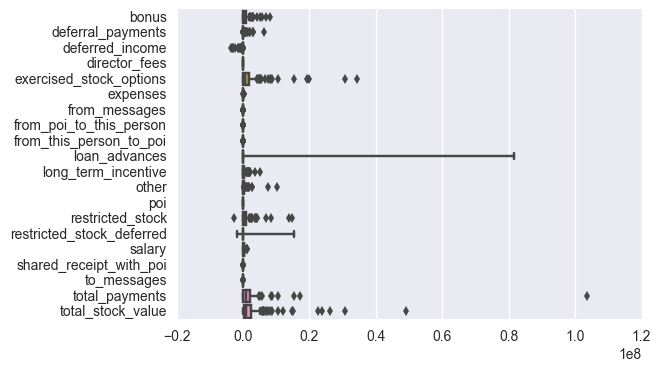

In [723]:
sns.boxplot(data = my_dataset, orient = 'h')

In [718]:
#Get relevant percentiles and see their distribution
my_dataset['total_stock_value'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0   -4.409300e+04
0.1    1.000000e-09
0.2    1.514180e+05
0.3    3.702275e+05
0.4    6.681320e+05
0.5    9.659550e+05
0.6    1.416848e+06
0.7    1.986612e+06
0.8    3.128982e+06
0.9    6.967692e+06
1.0    4.345095e+08
Name: total_stock_value, dtype: float64

In [719]:
my_dataset.transpose()

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4.175000e+06,1.000000e-09,1.000000e-09,1.200000e+06,4.000000e+05,1.000000e-09,7.000000e+05,5.249999e+06,1.000000e-09,1.000000e-09,...,3.250000e+05,1.000000e-09,1.000000e-09,3.000000e+06,4.500000e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
deferral_payments,2.869717e+06,1.789800e+05,1.000000e-09,1.295738e+06,2.604550e+05,6.846940e+05,1.000000e-09,2.144013e+06,-1.025000e+05,1.000000e-09,...,8.312990e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
deferred_income,-3.081055e+06,1.000000e-09,-5.104000e+03,-1.386055e+06,-2.016410e+05,1.000000e-09,1.000000e-09,-2.334434e+06,1.000000e-09,1.000000e-09,...,-5.833250e+05,-1.080000e+04,1.000000e-09,1.000000e-09,1.000000e-09,-2.500000e+04,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
director_fees,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,3.285000e+03,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.085790e+05,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
exercised_stock_options,1.729541e+06,2.578170e+05,4.046157e+06,6.680544e+06,1.000000e-09,1.599641e+06,1.000000e-09,9.531360e+05,3.285000e+03,1.624396e+06,...,1.668260e+06,1.000000e-09,9.871800e+04,3.282960e+06,1.297049e+06,1.000000e-09,1.000000e-09,1.391300e+05,8.308552e+06,1.927580e+05
expenses,1.386800e+04,3.486000e+03,5.630100e+04,1.120000e+04,1.291420e+05,1.000000e-09,3.717200e+04,1.735500e+04,1.000000e-09,1.189200e+04,...,1.000000e-09,5.187000e+04,1.000000e-09,5.783800e+04,8.135300e+04,1.413000e+03,1.000000e-09,1.000000e-09,5.394700e+04,5.509700e+04
from_messages,2.195000e+03,1.000000e-09,2.900000e+01,1.000000e-09,1.000000e-09,1.000000e-09,4.343000e+03,4.840000e+02,1.000000e-09,1.000000e-09,...,3.000000e+01,1.000000e-09,1.000000e-09,5.560000e+02,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
from_poi_to_this_person,4.700000e+01,1.000000e-09,3.900000e+01,1.000000e-09,1.000000e-09,1.000000e-09,1.440000e+02,2.280000e+02,1.000000e-09,1.000000e-09,...,2.200000e+01,1.000000e-09,1.000000e-09,1.860000e+02,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
from_this_person_to_poi,6.500000e+01,1.000000e-09,0.000000e+00,1.000000e-09,1.000000e-09,1.000000e-09,3.860000e+02,1.080000e+02,1.000000e-09,1.000000e-09,...,7.000000e+00,1.000000e-09,1.000000e-09,2.400000e+01,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
loan_advances,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09


name_df.loc[name_df['Name']=='TOTAL'].index

name_df.loc[name_df['Name']=='TOTAL']

name_df.loc[name_df['Name']=='LOCKHART EUGENE E'].index

name_df.loc[name_df['Name']=='THE TRAVEL AGENCY IN THE PARK'].index

df.drop(df.index[[]])

In [721]:
my_dataset.drop(['TOTAL','LOCKHART EUGENE E', 'THE TRAVEL AGENCY IN THE PARK'], inplace = True)

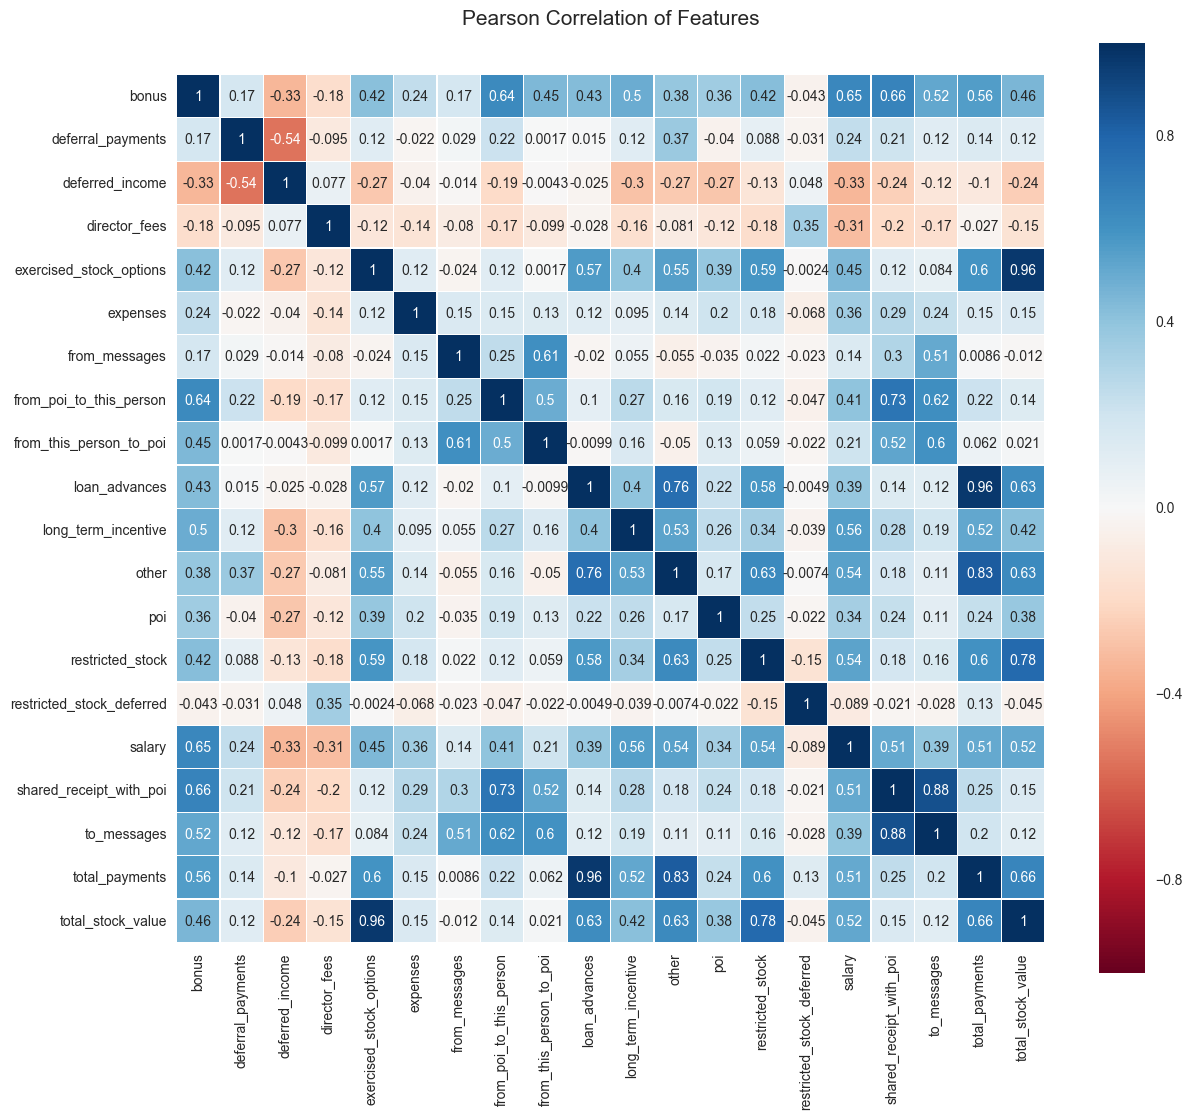

In [722]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(my_dataset.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [724]:
Y = my_dataset[['poi']].copy()

In [725]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(my_dataset, Y)
headers = my_dataset.columns
values = list(zip(my_dataset.columns, forest.feature_importances_))
#values = values.sort()
values_df = pd.DataFrame(values)
values_df = values_df.sort_values(by=[1])
print(pd.DataFrame(values_df))

                            0         1
1           deferral_payments  0.000000
3               director_fees  0.000000
11                      other  0.000000
14  restricted_stock_deferred  0.000000
9               loan_advances  0.000078
17                to_messages  0.004392
4     exercised_stock_options  0.005098
6               from_messages  0.013404
2             deferred_income  0.022085
18             total_payments  0.022150
15                     salary  0.024087
8     from_this_person_to_poi  0.029752
10        long_term_incentive  0.032515
19          total_stock_value  0.033081
0                       bonus  0.043680
5                    expenses  0.045395
13           restricted_stock  0.059063
16    shared_receipt_with_poi  0.063701
7     from_poi_to_this_person  0.067571
12                        poi  0.533949


C:\Users\203014767\.conda\envs\DAND\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [726]:
X = my_dataset.drop('poi', axis = 1)

X = my_dataset[['shared_receipt_with_poi', 'to_messages', 'long_term_incentive', 'from_poi_to_this_person', 'bonus', 'expenses', 'total_payments',
'deferred_income', 'exercised_stock_options']].copy()

In [727]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 19 columns):
bonus                        143 non-null float64
deferral_payments            143 non-null float64
deferred_income              143 non-null float64
director_fees                143 non-null float64
exercised_stock_options      143 non-null float64
expenses                     143 non-null float64
from_messages                143 non-null float64
from_poi_to_this_person      143 non-null float64
from_this_person_to_poi      143 non-null float64
loan_advances                143 non-null float64
long_term_incentive          143 non-null float64
other                        143 non-null float64
restricted_stock             143 non-null float64
restricted_stock_deferred    143 non-null float64
salary                       143 non-null float64
shared_receipt_with_poi      143 non-null float64
to_messages                  143 non-null float64
total_payments               1

In [735]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import numpy as np
import sklearn.learning_curve as curves
from sklearn.cross_validation import ShuffleSplit, train_test_split

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [737]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [738]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, LOWRY CHARLES P to PAI LOU L
Data columns (total 1 columns):
poi    100 non-null int64
dtypes: int64(1)
memory usage: 1.6+ KB


In [739]:
# this class is used to help with the pipeline.  
# More details on this class can found in chapter 2 of Hands-on Machine Learning with Scikit-Learn and Tensorflow
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
# Create a pipeline for quicker data preparation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold #keeps balancing constant
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix, recall_score

num_attribs = list(X_train)

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('skb', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler())        
        #('features', feature_union),
        #('pca', PCA(n_components = 3)),
        #('clf', GradientBoostingClassifier(random_state = 42)) #GaussianNB()) RandomForestClassifier(random_state=42))
         ])
'''
# Create parameters to random search to find an optimal pipeline
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
sss = StratifiedKFold(n_splits = 2, random_state=42)
param_distribs = {
    'features__pca__n_components': [2,3,4,5,6,7],
    'features__skb__k': range(1,10)
    #'KBest__k' : range(1,8)
    }
#Try from sklearn.cross_validation import StratifiedKFold... keeps balancing constant'''

"\n# Create parameters to random search to find an optimal pipeline\nfrom scipy.stats import randint\nfrom sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit\nsss = StratifiedKFold(n_splits = 2, random_state=42)\nparam_distribs = {\n    'features__pca__n_components': [2,3,4,5,6,7],\n    'features__skb__k': range(1,10)\n    #'KBest__k' : range(1,8)\n    }\n#Try from sklearn.cross_validation import StratifiedKFold... keeps balancing constant"

#### Data Preparation

In [740]:
X_train = num_pipeline.fit_transform(X_train)

In [741]:
X_test = num_pipeline.transform(X_test)

### Supervised Learning

#### Model Selection

In [742]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from random import seed, randint
from sklearn.metrics import f1_score
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

num_trees = 100
kfold = 10
seed=7
models = []
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(('EXTRA', ExtraTreesClassifier(n_estimators=num_trees)))
models.append(('ADA', AdaBoostClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('GBC', GradientBoostingClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.000000 (0.000000)
EXTRA: 0.100000 (0.300000)
ADA: 0.140000 (0.310483)
GBC: 0.206667 (0.343123)
NB: 0.238052 (0.208885)


In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


Automatically created module for IPython interactive environment


#### Learning Curves on Untuned Algorithms

In [ ]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)
#####################################
title2 = "Learning Curves (Gradient Boosting)"
cv = ShuffleSplit(n_splits=4, test_size=0.15, random_state=0)
estimator2 = GradientBoostingClassifier()
plot_learning_curve(estimator2, title2, X_train, y_train, cv = cv, n_jobs=4)
#####################################
title3 = "Learning Curves (ADA Boosting)"
cv = ShuffleSplit(n_splits=4, test_size=0.15, random_state=0)
estimator3 =  AdaBoostClassifier()
plot_learning_curve(estimator3, title3, X_train, y_train, cv = cv, n_jobs=4)


grid_search_recall = GridSearchCV(num_pipeline, param_grid=param_distribs, cv=sss,
                       scoring='recall_macro')
grid_search_recall.fit(X_train, y_train)

grid_search_prec = GridSearchCV(num_pipeline, param_grid=param_distribs, cv=sss,
                       scoring='precision_macro')
grid_search_prec.fit(X_train, y_train)

grid_search_f1 = GridSearchCV(num_pipeline, param_grid=param_distribs, cv=sss,
                       scoring='f1_macro')
grid_search_f1.fit(X_train, y_train)


In [281]:
print(grid_search_f1.best_params_)

{'features__pca__n_components': 3, 'features__skb__k': 2}


In [284]:
score_recall = pd.DataFrame(grid_search_recall.cv_results_)#.set_index('features__pca__n_components')
prec_recall = pd.DataFrame(grid_search_prec.cv_results_)#.set_index('features__pca__n_components')
f1_recall = pd.DataFrame(grid_search_f1.cv_results_)#.set_index('features__pca__n_components')

score_recall = pd.DataFrame(grid_search_recall.cv_results_).set_index('param_KBest__k')
prec_recall = pd.DataFrame(grid_search_prec.cv_results_).set_index('param_KBest__k')
f1_recall = pd.DataFrame(grid_search_f1.cv_results_).set_index('param_KBest__k')


In [287]:
score_recall

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_features__pca__n_components,param_features__skb__k,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0430,0.0020,0.663924,1.0,2,1,"{u'features__pca__n_components': 2, u'features...",1,0.694805,1.0,0.631783,1.0,1.200008e-02,1.192093e-07,0.031505,0.0
1,0.0280,0.0020,0.538476,1.0,2,2,"{u'features__pca__n_components': 2, u'features...",36,0.620130,1.0,0.453488,1.0,1.000047e-03,1.192093e-07,0.083304,0.0
2,0.0295,0.0015,0.550820,1.0,2,3,"{u'features__pca__n_components': 2, u'features...",33,0.620130,1.0,0.478682,1.0,2.499938e-03,4.999638e-04,0.070710,0.0
3,0.0280,0.0020,0.515685,1.0,2,4,"{u'features__pca__n_components': 2, u'features...",49,0.620130,1.0,0.406977,1.0,1.192093e-07,1.192093e-07,0.106555,0.0
4,0.0285,0.0015,0.592947,1.0,2,5,"{u'features__pca__n_components': 2, u'features...",12,0.691558,1.0,0.490310,1.0,4.999638e-04,4.999638e-04,0.100604,0.0
5,0.0290,0.0020,0.592947,1.0,2,6,"{u'features__pca__n_components': 2, u'features...",12,0.691558,1.0,0.490310,1.0,1.000166e-03,1.192093e-07,0.100604,0.0
6,0.0285,0.0020,0.592947,1.0,2,7,"{u'features__pca__n_components': 2, u'features...",12,0.691558,1.0,0.490310,1.0,5.000830e-04,0.000000e+00,0.100604,0.0
7,0.0345,0.0010,0.592947,1.0,2,8,"{u'features__pca__n_components': 2, u'features...",12,0.691558,1.0,0.490310,1.0,4.999638e-04,0.000000e+00,0.100604,0.0
8,0.0285,0.0015,0.568011,1.0,2,9,"{u'features__pca__n_components': 2, u'features...",20,0.631494,1.0,0.501938,1.0,4.999638e-04,5.000830e-04,0.064765,0.0
9,0.0305,0.0020,0.663924,1.0,3,1,"{u'features__pca__n_components': 3, u'features...",1,0.694805,1.0,0.631783,1.0,2.500057e-03,1.192093e-07,0.031505,0.0


In [288]:
array_rec = score_recall['mean_test_score'].values
array_prec = prec_recall['mean_test_score'].values
array_f1 = f1_recall['mean_test_score'].values

In [289]:
grid_search_plot = pd.DataFrame(np.column_stack([array_rec, array_prec, array_f1]), 
                               columns=['recall','precision','f1'])

https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba
SVCs, as you point out, are not really practical for anything but very small datasets.

The intended use is to figure out which model is the most superior, and to tell something about how well it performs. I found out that Micro measurements are superior according to: Forman, George, and Martin Scholz. "Apples-to-apples in cross-validation studies: pitfalls in classifier performance measurement." ACM SIGKDD Explorations Newsletter 12.1 (2010)

http://www.cnts.ua.ac.be/~vincent/pdf/microaverage.pdf
https://www.sciencedirect.com/science/article/pii/S0306457309000259

If the micromedia result is significantly lower than the macromedia one, it means that you have some gross misclassification in the most populated labels, whereas your smaller labels are probably correctly classified. If the macromedia result is significantly lower than the micromedia one, it means your smaller labels are poorly classified, whereas your larger ones are probably correctly classified.



In [270]:
grid_search_plot['SelectKBest'] = grid_search_plot.index + 1

In [291]:
grid_search_plot

,recall,precision,f1
0,0.663924,0.641112,0.642952
1,0.538476,0.567706,0.545271
2,0.550820,0.593462,0.561908
3,0.515685,0.564519,0.532279
4,0.592947,0.627423,0.604793
5,0.592947,0.627423,0.604793
6,0.592947,0.627423,0.604793
7,0.592947,0.627423,0.604793
8,0.568011,0.644184,0.585370
9,0.663924,0.641112,0.642952


In [292]:
plt.plot(grid_search_plot['SelectKBest'], grid_search_plot['f1'], '-b', label="f1") 
#the - in "-b" forms a line, the b makes the line blue.
plt.plot(grid_search_plot['SelectKBest'],grid_search_plot['recall'],'-r', label="recall") # add labels/colors here as well
plt.plot(grid_search_plot['SelectKBest'],grid_search_plot['precision'],'-g', label="precision")
plt.legend()
plt.xlabel('K Features')
plt.ylabel('Score')
plt.show()

KeyError: 'SelectKBest'

k = 2 NB

In [273]:
scores = ['precision', 'recall', 'f1']
#grid_search = GridSearchCV(num_pipeline, param_grid=param_distribs,scoring='f1', verbose = 8)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    grid_search2 = GridSearchCV(num_pipeline, param_grid=param_distribs, cv=sss,
                       scoring='%s_macro' % score)
    grid_search2.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(grid_search2.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = grid_search2.cv_results_['mean_test_score']
    stds = grid_search2.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid_search2.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
{'pca__n_components': 3}
()
Grid scores on development set:
()
0.466 (+/-0.076) for {'KBest__k': 1}
0.680 (+/-0.311) for {'KBest__k': 2}
0.675 (+/-0.320) for {'KBest__k': 3}
0.609 (+/-0.164) for {'KBest__k': 4}
0.511 (+/-0.153) for {'KBest__k': 5}
()
Detailed classification report:
()
The model is trained on the full development set.
The scores are computed on the full evaluation set.
()
             precision    recall  f1-score   support

        0.0       0.90      0.95      0.92        38
        1.0       0.33      0.20      0.25         5

avg / total       0.83      0.86      0.84        43

()
# Tuning hyper-parameters for recall
()
Best parameters set found on development set:
()
{'pca__n_components': 3}
()
Grid scores on development set:
()
0.456 (+/-0.096) for {'KBest__k': 1}
0.622 (+/-0.164) for {'KBest__k': 2}
0.610 (+/-0.189) for {'KBest__k': 3}
0.543 (+/-0.035) for {'KBest__k': 4}

In [357]:
score = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending = False)

In [358]:
score

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_KBest__k,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0214,0.0022,0.738284,0.749829,1,{u'KBest__k': 1},1,0.666667,0.792754,0.5,...,0.803922,0.75,0.750000,0.681818,1.000000,0.681818,0.000490,0.0004,0.164020,0.062815
1,0.0234,0.0022,0.610784,0.875823,2,{u'KBest__k': 2},2,0.444444,0.992754,0.5,...,0.637255,0.85,0.750000,0.818182,0.750000,0.818182,0.001855,0.0004,0.126067,0.065680
3,0.0478,0.0018,0.583578,0.905455,4,{u'KBest__k': 4},3,0.472222,1.000000,0.5,...,0.500000,0.90,0.970588,0.909091,0.500000,0.818182,0.053600,0.0004,0.187757,0.057668
4,0.0206,0.0018,0.577990,0.952727,5,{u'KBest__k': 5},4,0.472222,1.000000,0.5,...,0.500000,0.95,0.720588,0.863636,0.720588,1.000000,0.000800,0.0004,0.112116,0.049843
2,0.0222,0.0020,0.471569,0.884914,3,{u'KBest__k': 3},5,0.444444,0.992754,0.5,...,0.500000,0.90,0.411765,0.818182,0.500000,0.863636,0.001721,0.0000,0.036319,0.059970


.sort_values(by='mean_validation_score', ascending = False)

In [273]:
results = grid_search_fit.cv_results_

In [272]:
def grid_scores_to_df(grid_search_fit.cv_results_):
    """
    Convert a sklearn.grid_search.GridSearchCV.grid_scores_ attribute to a tidy
    pandas DataFrame where each row is a hyperparameter-fold combinatination.
    """
    rows = list()
    for grid_score in grid_scores:
        for fold, score in enumerate(grid_score.cv_validation_scores):
            row = grid_score.parameters.copy()
            row['fold'] = fold
            row['score'] = score
            rows.append(row)
    df = pd.DataFrame(rows)
    return df

SyntaxError: invalid syntax (<ipython-input-272-ff9a2502136a>, line 1)

In [274]:
grid_scores_to_df(results)

AttributeError: 'str' object has no attribute 'cv_validation_scores'

from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np

scaler = MinMaxScaler()
scaled_features_train = scaler.fit_transform(X_train)
scaled_features_test = scaler.transform(X_test)

In [123]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):

    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(pipe_grid.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

NameError: name 'pipe_grid' is not defined

In [ ]:
pipeline2 = Pipeline([("pca", pca), ("classifier", clf2)])
param_grid2 = dict(pca__n_components=range(1,8),
                 classifier__min_samples_split = (3, 50))
grid_search2 = GridSearchCV(pipeline2, param_grid=param_grid2, scoring='f1', cv = sss)
grid_fit2 = grid_search2.fit(scaled_features_train, labels_train)
second_clf = grid_fit2.best_estimator_

Top right, you've got a dumpster fire. Your model can't learn the training examples well AND you're generalizing even worse. Time to go back to the drawing board. 


In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

In [31]:
from random import seed, randint
from sklearn.metrics import f1_score
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
import random
import pandas as pd

param_grid = {'learning_rate' : uniform(), 
'max_depth' : randint(low=1, high=40),
'min_samples_split': randint(low=2, high=5),
'subsample': uniform(), 
'n_estimators' : randint(low=3000, high=5000) }

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
rsearch = RandomizedSearchCV(estimator=estimator2, param_distributions=param_grid, n_iter=5, cv = cv, 
                             random_state=7, verbose = 2)
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_estimator_)
print(rsearch.best_params_)

final_model = rsearch.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_samples_split=4, n_estimators=4603, learning_rate=0.076308289374, max_depth=26, subsample=0.978222897079 
[CV]  min_samples_split=4, n_estimators=4603, learning_rate=0.076308289374, max_depth=26, subsample=0.978222897079, total=   0.9s
[CV] min_samples_split=4, n_estimators=4603, learning_rate=0.076308289374, max_depth=26, subsample=0.978222897079 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  min_samples_split=4, n_estimators=4603, learning_rate=0.076308289374, max_depth=26, subsample=0.978222897079, total=   1.0s
[CV] min_samples_split=4, n_estimators=4603, learning_rate=0.076308289374, max_depth=26, subsample=0.978222897079 
[CV]  min_samples_split=4, n_estimators=4603, learning_rate=0.076308289374, max_depth=26, subsample=0.978222897079, total=   1.0s
[CV] min_samples_split=4, n_estimators=4603, learning_rate=0.076308289374, max_depth=26, subsample=0.978222897079 
[CV]  min_samples_split=4, n_estimators=4603, learning_rate=0.076308289374, max_depth=26, subsample=0.978222897079, total=   0.9s
[CV] min_samples_split=4, n_estimators=4603, learning_rate=0.076308289374, max_depth=26, subsample=0.978222897079 
[CV]  min_samples_split=4, n_estimators=4603, learning_rate=0.076308289374, max_depth=26, subsample=0.978222897079, total=   0.9s
[CV] min_samples_split=2, n_estimators=3345, learning_rate=0.455584913328, max_depth=15, subsample=0.0720511333598 
[CV]  min_samples_s

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   25.4s finished


0.81
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.26843898010187117, loss='deviance',
              max_depth=39, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=4456,
              presort='auto', random_state=None,
              subsample=0.80373903610437547, verbose=0, warm_start=False)
{'min_samples_split': 2, 'n_estimators': 4456, 'learning_rate': 0.26843898010187117, 'max_depth': 39, 'subsample': 0.80373903610437547}


The optimal model is still showing high bias.
We could either increase the number of trees by a ton, or we could reduce the min_samples_split to something like 1% of the data size. Doing exactly that, we get something that looks like one of our nice clean, theoretical models:
http://www.ultravioletanalytics.com/blog/kaggle-titanic-competition-part-ix-bias-variance-and-learning-curves
https://medium.com/rants-on-machine-learning/7-ways-to-improve-your-predictive-models-753705eba3d6


<module 'matplotlib.pyplot' from 'C:\Users\203014767\.conda\envs\DAND\lib\site-packages\matplotlib\pyplot.pyc'>

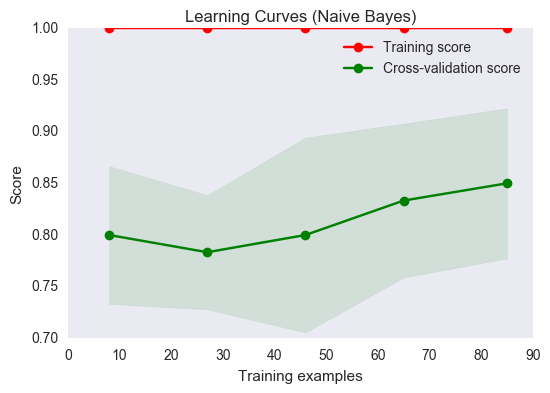

In [32]:
cv = ShuffleSplit(n_splits=4, test_size=0.15, random_state=0)
plot_learning_curve(final_model, title, X_train, y_train, cv = cv, n_jobs=4)

Tuning the model improved the bias for the Gradiant Boosting Algorithm.  Let's now test ROC, consufion matrix, and F1 score.

In [55]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix, recall_score

In [70]:
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
NB_train_pred = NB_clf.predict(X_train)
nb_prec_train = precision_score(NB_train_pred, y_train)
nb_recall_train = recall_score(NB_train_pred, y_train)
nb_f1_train = f1_score(NB_train_pred, y_train)

print("NB Precision Train: {}".format(nb_prec_train))
print ("NB Recall Train: {}".format(nb_recall_train))
print ("NB F1 Train: {}".format(nb_f1_train))

NB Precision Train: 0.307692307692
NB Recall Train: 0.4
NB F1 Train: 0.347826086957


In [89]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ["Low Risk Person","Person of Interest"]


In [88]:
y_test.groupby('poi')[['poi']].count()

,poi
poi,
0.0,38
1.0,5


print(confusion_matrix(y_test, y_pred))

NB Precision Test: 0.6
NB Recall Test: 0.5
NB F1 Test: 0.545454545455
NB Confusion Matrix Test: [[35  3]
 [ 2  3]]
Confusion matrix, without normalization
[[35  3]
 [ 2  3]]
Normalized confusion matrix
[[ 0.92  0.08]
 [ 0.4   0.6 ]]


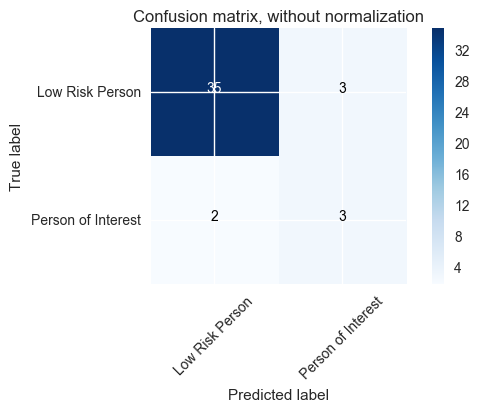

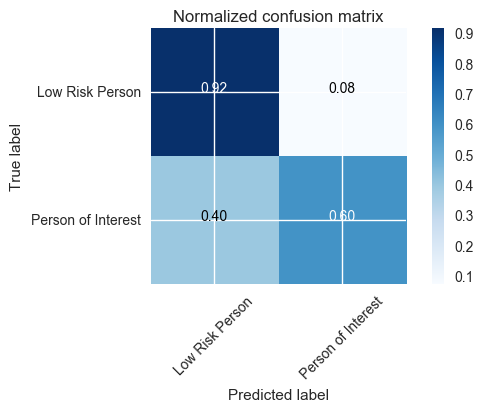

In [90]:
from sklearn.metrics import confusion_matrix
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

NB_test_pred = NB_clf.predict(X_test)
nb_prec_test = precision_score(NB_test_pred, y_test)
nb_recall_test = recall_score(NB_test_pred, y_test)
nb_f1_test = f1_score(NB_test_pred, y_test)
nb_cf =  confusion_matrix(y_test, NB_test_pred)

print("NB Precision Test: {}".format(nb_prec_test))
print ("NB Recall Test: {}".format(nb_recall_test))
print ("NB F1 Test: {}".format(nb_f1_test))
print ("NB Confusion Matrix Test: {}".format(nb_cf))

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb_cf, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb_cf, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [75]:
GBC_clf = final_model
GBC_clf.fit(X_train, y_train)
GBC_test_pred = GBC_clf.predict(X_test)
GBC_prec_test = precision_score(GBC_test_pred, y_test)
GBC_recall_test = recall_score(GBC_test_pred, y_test)
GBC_f1_test = f1_score(GBC_test_pred, y_test)

print("GBC Precision Test: {}".format(GBC_prec_test))
print ("GBC Recall Test: {}".format(GBC_recall_test))
print ("GBC F1 Test: {}".format(GBC_f1_test))

GBC Precision Test: 0.4
GBC Recall Test: 0.333333333333
GBC F1 Test: 0.363636363636


In [73]:
ADA_clf = AdaBoostClassifier()
ADA_clf.fit(X_train, y_train)
ADA_test_pred = ADA_clf.predict(X_test)
ADA_prec_test = precision_score(ADA_test_pred, y_test)
ADA_recall_test = recall_score(ADA_test_pred, y_test)
ADA_f1_test = f1_score(ADA_test_pred, y_test)

print("ADA Precision Test: {}".format(ADA_prec_test))
print ("ADA Recall Test: {}".format(ADA_recall_test))
print ("ADA F1 Test: {}".format(ADA_f1_test))

ADA Precision Test: 0.2
ADA Recall Test: 0.166666666667
ADA F1 Test: 0.181818181818


In [ ]:
pred_train_dt = second_clf.predict(scaled_features_train)
dt_train_acc = accuracy_score(pred_train_dt, labels_train)
dt_train_all = precision_recall_fscore_support(pred_train_dt, labels_train)
pred_test_dt = second_clf.predict(scaled_features_test)
dt_test_acc = accuracy_score(pred_test_dt, labels_test)

In [49]:
from pandas_ml import ConfusionMatrix

binary_confusion_matrix = ConfusionMatrix(y_true, y_pred)

In [237]:
#code snippet showing how to use SelectFromModel to keep only features with a feature_importance that lies above the mean

from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(clf, prefit=True)

# Generate new training set, keeping only the selected features
train_x_new = sfm.transform(train_x)

print("Original num features: {}, selected num features: {}"
      .format(train_x.shape[1], train_x_new.shape[1]))

> Original num features: 119, selected num features: 7

SyntaxError: invalid syntax (<ipython-input-237-ab119afb4b18>, line 11)

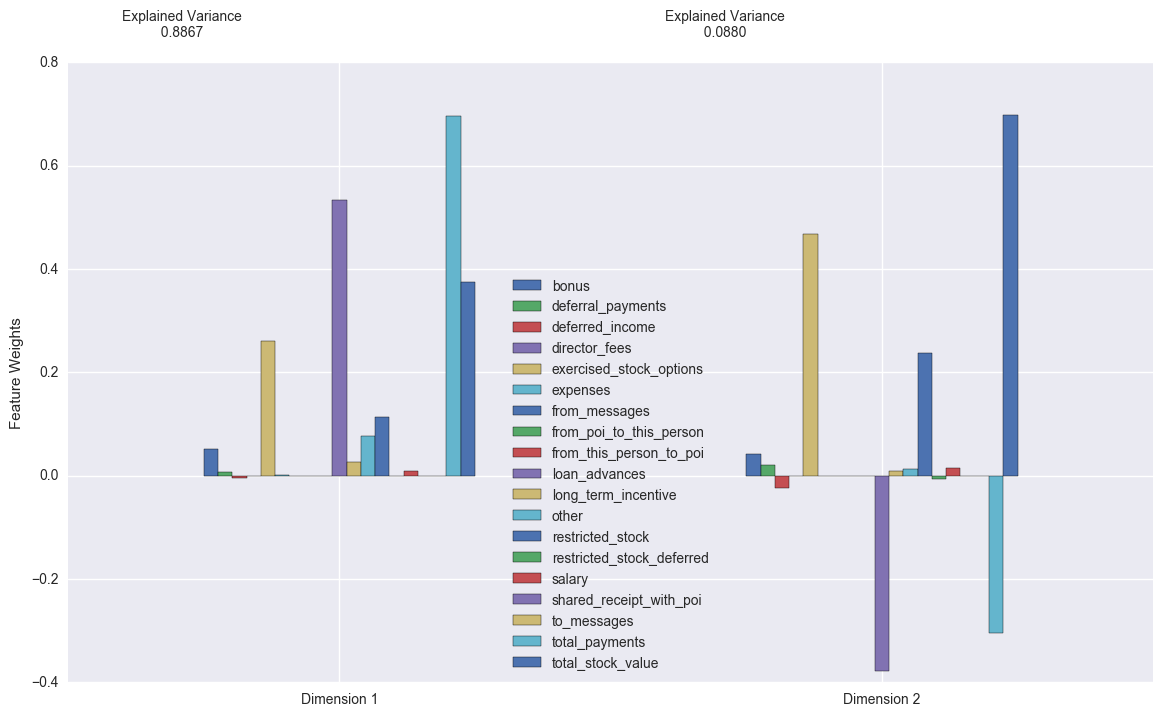

In [314]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=2).fit(X_train)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(X_train)

# Generate PCA results plot
pca_results = vs.pca_results(X_train, pca)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

We can apply this model to any given incoming transaction and get a probability score for how likely this transaction is to be fraudulent:
clf.predict_proba(df_real)

   Array that represents the probability of the transaction
   having a label of 0 (in position 0) or 1 (in position 1)
> [[  9.99999994e-01   5.87025707e-09]]
sum of squared errors is loss function for 0 and 1 class
negative log is loss function for proabilities
To produce a model that is robust against current attacks, your training set should thus weight recent data more heavily, either by relying only on the past n days or weeks, or by using some kind of decay function to downsample historical data.

You can solve the feature correlation problem by computing covariance matrices between your features and combining highly correlated features

Logistic regression, SVMs, and decision trees/forests have methods of determining relative feature importance; you can run these and keep only the features with highest importance.

You can use upper L 1 regularization (see the next section) for feature selection in logistic regression and SVM classifiers.

Another common method for model comparison is to plot the receiver operating characteristic (ROC) curve and compute the area under the curve (AUC). 

e AUC can be interpreted as the probability that a randomly chosen positive example has a higher score than a randomly chosen negative example; under this interpretation it’s easy to see that the worst case is AUC 0.5, which is equivalent to a random ordering of samples.32

The F-score combines precision and recall and harshly penalizes extremes; however, it requires choosing a threshold and a relative weighting of precision and recall (parametrized by alpha).

### Clustering
k-means is usually the first algorithm that comes to mind when you think of clustering. k-means applies to real-valued vectors, when you know how many clusters you expect; the number of clusters is denoted by k. The goal of the algorithm is to assign each data point to a cluster such that the sum of the distances from each point to its cluster centroid is minimized.

Warning: loss functions computed using different values of k are not comparable to each other!

You must normalize your data before using k-means.

Beware when using k-means with binary features

k-means loses effectiveness in high dimensions, due to the “curse of dimensionality”—all points are roughly equally distant from each other. For best results use k-means in low dimensions or after applying a dimensionality reduction algorithm such as principal component analysis (PCA).

Density-Based Spatial Clustering of Applications with Noise35 (DBSCAN) is one of the most popular and widely used clustering algorithms because of its generally good performance in different scenarios. Unlike with k-means, the number of clusters is not operator-defined but instead inferred from the data. Unlike hierarchical clustering, which is distance-based, DBSCAN is a density-based algorithm that divides datasets up into subgroups of high-density regions. Let’s consider some of the terminology introduced by this algorithm:

https://www.safaribooksonline.com/library/view/machine-learning-and/9781491979891/ch02.html#choosing_thresholds_and_comparing_models

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components = 3)
clf = GaussianNB()

In [50]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
sss = StratifiedShuffleSplit(100, test_size=0.5, random_state=42)


In [51]:
pipeline = Pipeline([("pca", pca), ("classifier", clf)])

In [52]:
param_grid = dict(pca__n_components=range(1,8))
                 

In [53]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='f1', cv = sss)

In [54]:
grid_fit = grid_search.fit(scaled_features_train, labels_train)

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [304]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.886728  ,  0.97472542])

For PCA what did explained variance for various n_components look like?
With respect to tuning and even for whenever gcsv is used with this data, I would recommend using StratifiedShulffleSplit2 as the CV object. This is ideal for small data sets with imbalanced classes.  When I used StratifiedKFold, I set the argument 'shuffle=True'. I am guessing this does similar shuffle as StratifiedShuffleSplit? YES
Whenever using train_test_split I would recommend using stratify= 'labels', this will maintain the ratio of poi to non-poi in the split data.
For tuning it's best to pick a few parameters and to look at a few settings with a large range. This is course tuning. Once that is done tuning can be refined using the information from course tuning, and or other steps, such as feature selection, can be revisited.
https://github.com/lmarkely/enron_fraud8
https://discussions.udacity.com/t/unsatisfied-with-low-f1-precision-recall/302772/8
https://discussions.udacity.com/t/selectkbest-best-value-for-k/235319/3
https://discussions.udacity.com/t/plotting-precision-vs-recall-using-pandas-plot-how-to-facet-by-clf/182117/4

In [69]:
from tester import test_classifier
test_classifier(first_clf, my_dataset, features_list)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', GaussianNB(priors=None))])
	Accuracy: 0.86560	Precision: 0.49211	Recall: 0.24950	F1: 0.33112	F2: 0.27679
	Total predictions: 15000	True positives:  499	False positives:  515	False negatives: 1501	True negatives: 12485



I wonder if removing the feature that I engineered (cash_payments) would improve the scores.  Let's try it.

In [496]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 40000000.0, 20000000,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=10)

    plt.ylim([-10000000,25000000]) 
    plt.xlim([-5000000,15000000])  
    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

In [72]:
labels, features = targetFeatureSplit(data)

In [39]:
from tester import test_classifier
test_classifier(final_model, my_dataset_test, features_list)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.26843898010187117, loss='deviance',
              max_depth=39, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=4456,
              presort='auto', random_state=None,
              subsample=0.80373903610437547, verbose=0, warm_start=False)
	Accuracy: 0.85020	Precision: 0.41284	Recall: 0.29250	F1: 0.34241	F2: 0.31061
	Total predictions: 15000	True positives:  585	False positives:  832	False negatives: 1415	True negatives: 12168



Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', GaussianNB(priors=None))])
	Accuracy: 0.87813	Precision: 0.57504	Recall: 0.32950	F1: 0.41894	F2: 0.36027
	Total predictions: 15000	True positives:  659	False positives:  487	False negatives: 1341	True negatives: 12513


Just as I suspected, removing my engineered feature improved the scores!

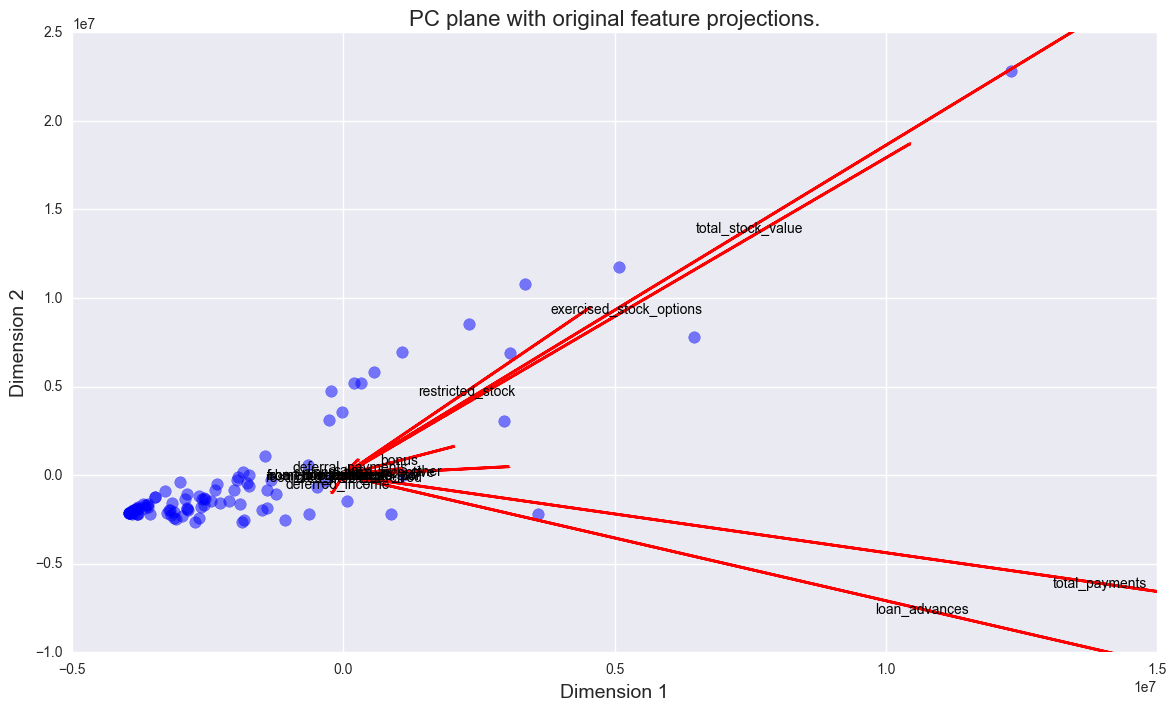

In [497]:
# Create a biplot
biplot(X_train, reduced_data, pca)